# Introduction to Google Colab

## Jupyter notebook basics

### Code cells

In [1]:
!ls

sample_data


### Text cells

## Access to the shell

In [2]:
 !pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 48 kB/s 
     |████████████████████████████████| 199 kB 66.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e0f1725e44f12655fe48afa0be4f8476106911232d434f70351b34035031a431
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


## Install Spark

In [3]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [5]:
!ls

sample_data  spark-3.3.1-bin-hadoop3  spark-3.3.1-bin-hadoop3.tgz


In [6]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [7]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [ ]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-3.3.1-bin-hadoop3
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz  spark-3.3.1-bin-hadoop3.tgz


In [8]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2022-12-31 06:26:46--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   1.69G  3.04MB/s    in 10m 2s  

2022-12-31 06:36:48 (2.88 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1818479494]



In [9]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [33]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [11]:
rc.show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| fal

In [12]:
!ls

reported-crimes.csv  spark-3.3.1-bin-hadoop3
sample_data	     spark-3.3.1-bin-hadoop3.tgz


In [13]:
rc.take(2)

[Row(ID='10224738', Case Number='HY411648', Date=datetime.datetime(2015, 9, 5, 13, 30), Block='043XX S WOOD ST', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='RESIDENCE', Arrest='false', Domestic='true', Beat='0924', District='009', Ward='12', Community Area='61', FBI Code='08B', X Coordinate='1165074', Y Coordinate='1875917', Year='2015', Updated On='02/10/2018 03:50:01 PM', Latitude='41.815117282', Longitude='-87.669999562', Location='(41.815117282, -87.669999562)'),
 Row(ID='10224739', Case Number='HY411615', Date=datetime.datetime(2015, 9, 4, 11, 30), Block='008XX N CENTRAL AVE', IUCR='0870', Primary Type='THEFT', Description='POCKET-PICKING', Location Description='CTA BUS', Arrest='false', Domestic='false', Beat='1511', District='015', Ward='29', Community Area='25', FBI Code='06', X Coordinate='1138875', Y Coordinate='1904869', Year='2015', Updated On='02/10/2018 03:50:01 PM', Latitude='41.895080471', Longitude='-87.765400451', 

In [ ]:
rc.limit(2).collect()

[Row(ID='10224738', Case Number='HY411648', Date=datetime.datetime(2015, 9, 5, 13, 30), Block='043XX S WOOD ST', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='RESIDENCE', Arrest='false', Domestic='true', Beat='0924', District='009', Ward='12', Community Area='61', FBI Code='08B', X Coordinate='1165074', Y Coordinate='1875917', Year='2015', Updated On='02/10/2018 03:50:01 PM', Latitude='41.815117282', Longitude='-87.669999562', Location='(41.815117282, -87.669999562)'),
 Row(ID='10224739', Case Number='HY411615', Date=datetime.datetime(2015, 9, 4, 11, 30), Block='008XX N CENTRAL AVE', IUCR='0870', Primary Type='THEFT', Description='POCKET-PICKING', Location Description='CTA BUS', Arrest='false', Domestic='false', Beat='1511', District='015', Ward='29', Community Area='25', FBI Code='06', X Coordinate='1138875', Y Coordinate='1904869', Year='2015', Updated On='02/10/2018 03:50:01 PM', Latitude='41.895080471', Longitude='-87.765400451', 

In [ ]:
limit
collect
take
show

In [14]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [15]:
import pandas as pd

In [16]:
from pandas.io.parsers.readers import read_csv
df=read_csv("reported-crimes.csv")

In [17]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [18]:
from pyspark.sql.types import StructType,StructField,StringType,TimestampType,BooleanType,DoubleType,IntegerType

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [19]:
StructType([
    StructField('ID',StringType,True),
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location'])

AssertionError: ignored

In [20]:
labels=[
    ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
 ]

In [34]:
schema=StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [22]:
rc=spark.read.csv('reported-crimes.csv',schema=schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [23]:
rc.show(5)

+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|nul

In [ ]:
rc.withColumnRenamed(exi,new) 
rc.drop()
rc.groupBy

In [24]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|0486|
|0870|
|0810|
|2023|
+----+
only showing top 5 rows



In [25]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0486|
|0870|
|0810|
|2023|
+----+
only showing top 5 rows



In [27]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0486|
|0870|
|0810|
|2023|
+----+
only showing top 5 rows



In [28]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|null|Arrest|
|   HY411648|null| false|
|   HY411615|null| false|
|   JC213529|null| false|
+-----------+----+------+
only showing top 4 rows



In [29]:
from pyspark.sql.functions import lit
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|null|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Co

In [30]:
rc=rc.drop('IUCR')
rc.show(5)

+--------+-----------+----+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|null|          Updated 

In [31]:
one_day=spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-11'))
one_day.count()

11

In [35]:
rc.union(one_day).orderBy('Date',ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11504529|   JB512336|2018-11-11 00:00:00|     026XX W 21ST ST|1320|CRIMINAL DAMAGE|          TO VEHICLE|              STREET| false|   false|

In [38]:
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418499|
|            BATTERY|1232270|
|    CRIMINAL DAMAGE| 771514|
|          NARCOTICS| 711762|
|      OTHER OFFENSE| 418898|
|            ASSAULT| 418520|
|           BURGLARY| 388040|
|MOTOR VEHICLE THEFT| 314131|
| DECEPTIVE PRACTICE| 266950|
|            ROBBERY| 255601|
+-------------------+-------+
only showing top 10 rows



In [40]:
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770614|
|           RESIDENCE|1145915|
|           APARTMENT| 699006|
+--------------------+-------+
only showing top 3 rows



In [41]:
rc.select(rc.Arrest==True)/rc.count()

6755823

In [51]:
#rc.select(rc.Arrest.show(5))
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.27754101905866985

In [52]:
rc.select()

In [53]:
from pyspark.sql import functions

In [54]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'List', 'Optional', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'a

In [55]:
from pyspark.sql.functions import lower,upper,substring

In [56]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [62]:
rc.select(substring(col('Primary Type'),1,4)).show(5)

+-----------------------------+
|substring(Primary Type, 1, 4)|
+-----------------------------+
|                         BATT|
|                         THEF|
|                         THEF|
|                         NARC|
|                         ASSA|
+-----------------------------+
only showing top 5 rows



In [65]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [66]:
from pyspark.sql.functions import min,max

In [68]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



In [69]:
from pyspark.sql.functions import date_add,date_sub

In [70]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



In [71]:
from pyspark.sql.functions import to_date,to_timestamp,lit

In [72]:
df=spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show( )

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [75]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [78]:
df=spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(2)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [84]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),
    to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                                    null|                                         null|
+----------------------------------------+---------------------------------------------+



In [87]:
df=spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1,truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [91]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa')).show(1)

+------------------------------------------+-----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss aa)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss aa)|
+------------------------------------------+-----------------------------------------------+
|                                2019-12-25|                            2019-12-25 13:30:00|
+------------------------------------------+-----------------------------------------------+



In [90]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")


DataFrame[key: string, value: string]

In [92]:
nrc=spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|   

In [95]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2022-12-31 12:01:14--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2022-12-31 12:01:14 (791 MB/s) - ‘police-station.csv’ saved [5699]



In [96]:
!ls

police-station.csv   sample_data	      spark-3.3.1-bin-hadoop3.tgz
reported-crimes.csv  spark-3.3.1-bin-hadoop3


In [97]:
ps=spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [103]:
rc.cache()
rc.count()

6755823

In [104]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [102]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|    null|
|     021|
+--------+



In [105]:
from pyspark.sql.functions import lpad

In [106]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [113]:
ps.select(lpad(col('DISTRICT'),3,'0')).show(30)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
|                 014|
|                 015|
|                 016|
|                 017|
+--------------------+



In [115]:
ps = ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [116]:
rc.join(ps,rc.District==ps.Format_district,'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+

In [117]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [118]:
rc.join(ps,rc.District==ps.Format_district,'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|            009|
|1022473

In [120]:
rc.cache()
rc.count()

6755823

In [121]:
rc.show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| fal

In [122]:
rc.select(col('Primary Type')).distinct().count()

36

In [128]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [130]:
nc=rc.filter((col('Primary Type')=='NON - CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|      NON - CRIMINAL|   FOID - REVOCATION|           RESIDE

In [132]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [133]:
from pyspark.sql.functions import dayofweek

In [134]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [135]:
from pyspark.sql.functions import date_format

In [136]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).groupBy().show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [137]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017334|
|                 Wed| 974249|
|                 Tue| 968380|
|                 Sat| 965476|
|                 Thu| 964965|
|                 Mon| 953110|
|                 Sun| 912309|
+--------------------+-------+



In [140]:
dow=[x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect() ]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [138]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912309),
 Row(date_format(Date, E)='Mon', count=953110),
 Row(date_format(Date, E)='Thu', count=964965),
 Row(date_format(Date, E)='Sat', count=965476),
 Row(date_format(Date, E)='Wed', count=974249),
 Row(date_format(Date, E)='Fri', count=1017334),
 Row(date_format(Date, E)='Tue', count=968380)]

In [142]:
cnt=[x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect() ]
cnt

[912309, 953110, 964965, 965476, 974249, 1017334, 968380]

In [143]:
import pandas as pd
import matplotlib.pyplot as plt



In [147]:
cp=pd.DataFrame({'Day_of_week':dow,'Count':cnt})
cp

,Day_of_week,Count
0,Sun,912309
1,Mon,953110
2,Thu,964965
3,Sat,965476
4,Wed,974249
5,Fri,1017334
6,Tue,968380


Text(0.5, 1.0, 'No of reported crimes per day of the week from 2001 to present')

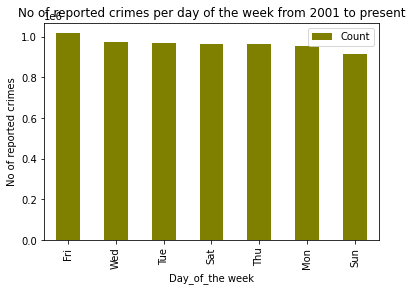

In [150]:
cp.sort_values('Count',ascending=False).plot(kind='bar',color='olive',x='Day_of_week',y='Count')
plt.xlabel('Day_of_the week')
plt.ylabel('No of reported crimes')
plt.title('No of reported crimes per day of the week from 2001 to present')

In [153]:
psrdd=sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [154]:
ps_header=psrdd.first()

In [156]:
ps_rest=psrdd.filter(lambda line:line!=ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [159]:
ps_rest.map(lambda line:line.split(',')).count()

24

In [163]:
(ps_rest.filter(lambda line:line.split(',')[0]=='7').
 map(lambda line:(line.split(',')[0],
     line.split(',')[1],
     line.split(',')[2],
     line.split(',')[5]
     )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

In [165]:
(ps_rest.filter(lambda line:line.split(',')[0]in ['10','11']).
 map(lambda line:(
     line.split(',')[1],
     line.split(',')[2],
     line.split(',')[5]
     )).collect())

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]